# ***Problem statement:***
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.


In [1]:
!pip install tensorflow

# **Import the skin cancer dataset**

Import the required python libs

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import zipfile
import pathlib
from tensorflow import keras
import glob
import os

In [3]:
from google.colab import drive

drive.mount("/content/drive/")

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/CNN_assignment.zip", "r")
zip_ref.extractall("/content/")
zip_ref.close()

Mounted at /content/drive/


Load the image data set to the variables

In [4]:
data_dir_train = pathlib.Path(
    "/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
)
data_dir_test = pathlib.Path(
    "/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test"
)

In [5]:
image_count_train = len(list(data_dir_train.glob("*/*.jpg")))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob("*/*.jpg")))
print(image_count_test)

2239
118


Load the Dataset using the keras preprocessing

Parameters for loaders

In [6]:
batch_size = 32
img_height = 180
img_width = 180

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, seed=123, image_size=(img_width, img_height)
)

Found 2239 files belonging to 9 classes.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test, seed=123, image_size=(img_width, img_height)
)

Found 118 files belonging to 9 classes.


In [9]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


# **Visualize the image dataset**

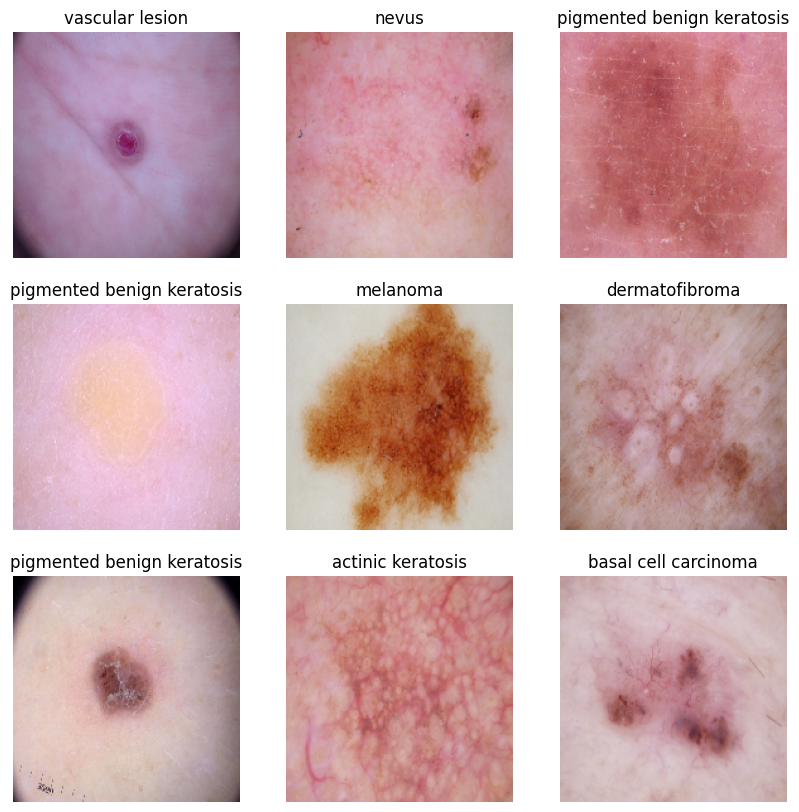

In [10]:
num_classes = len(class_names)
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(num_classes):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [11]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# **Standardize the data**
The RGB channel values are in the [0, 255] range. This is not ideal for a neural network; in general you should seek to make your input values small using tf.keras.layers.Rescaling

# **Compile the model**
Choose an appropirate optimiser and loss function for model training

In [13]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(1.0 / 255, input_shape=(img_height, img_width, 3)),
        tf.keras.layers.Conv2D(32, 3, padding="same", activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, padding="same", activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(128, 3, padding="same", activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(256, 3, padding="same", activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(512, 3, padding="same", activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation="relu"),
        tf.keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

In [14]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 128)       7

# **Train the model**

In [16]:
epochs = 20
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/20
70/70 [==============================] - 36s 131ms/step - loss: 2.0018 - accuracy: 0.2474 - val_loss: 2.3008 - val_accuracy: 0.2458
Epoch 2/20
70/70 [==============================] - 4s 54ms/step - loss: 1.7114 - accuracy: 0.3636 - val_loss: 2.2851 - val_accuracy: 0.3220
Epoch 3/20
70/70 [==============================] - 4s 55ms/step - loss: 1.6208 - accuracy: 0.4158 - val_loss: 2.1645 - val_accuracy: 0.2627
Epoch 4/20
70/70 [==============================] - 4s 54ms/step - loss: 1.5381 - accuracy: 0.4582 - val_loss: 2.3073 - val_accuracy: 0.2966
Epoch 5/20
70/70 [==============================] - 4s 59ms/step - loss: 1.4728 - accuracy: 0.4850 - val_loss: 2.2742 - val_accuracy: 0.2797
Epoch 6/20
70/70 [==============================] - 4s 57ms/step - loss: 1.4178 - accuracy: 0.5038 - val_loss: 2.2893 - val_accuracy: 0.2627
Epoch 7/20
70/70 [==============================] - 4s 55ms/step - loss: 1.3755 - accuracy: 0.5190 - val_loss: 2.1440 - val_accuracy: 0.3220
Epoch 8/20


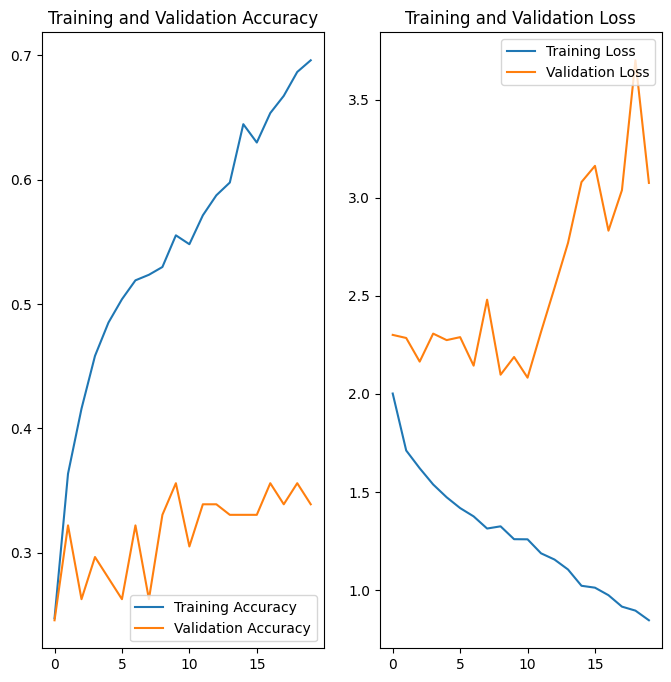

In [17]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()

# **Conclusion**
  The above model is overfitting it does well on the the training set and not perform well on the validation set.

# **Data Augmentation**
Data Augmentation to solves the overfitting of data

In [18]:
data_augmentation = keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal_and_vertical"),
        tf.keras.layers.RandomRotation(0.4),
        tf.keras.layers.RandomContrast(0.2),
        tf.keras.layers.RandomCrop(height=img_height, width=img_width),
        tf.keras.layers.RandomTranslation(height_factor=0.2, width_factor=0.2),
    ]
)

In [19]:
model = tf.keras.Sequential(
    [
        data_augmentation,
        tf.keras.layers.Rescaling(1.0 / 255, input_shape=(img_height, img_width, 3)),
        tf.keras.layers.Conv2D(32, 3, padding="same", activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, padding="same", activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(128, 3, padding="same", activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(256, 3, padding="same", activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(512, 3, padding="same", activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation="relu"),
        tf.keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

In [20]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [21]:
epochs = 20
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/20
70/70 [==============================] - 10s 71ms/step - loss: 2.0641 - accuracy: 0.1956 - val_loss: 2.2306 - val_accuracy: 0.1356
Epoch 2/20
70/70 [==============================] - 4s 59ms/step - loss: 2.0213 - accuracy: 0.2046 - val_loss: 2.2138 - val_accuracy: 0.1356
Epoch 3/20
70/70 [==============================] - 4s 59ms/step - loss: 1.9721 - accuracy: 0.2488 - val_loss: 3.0940 - val_accuracy: 0.2542
Epoch 4/20
70/70 [==============================] - 5s 66ms/step - loss: 1.9021 - accuracy: 0.2715 - val_loss: 2.1910 - val_accuracy: 0.2542
Epoch 5/20
70/70 [==============================] - 5s 70ms/step - loss: 1.7474 - accuracy: 0.3359 - val_loss: 2.0726 - val_accuracy: 0.2288
Epoch 6/20
70/70 [==============================] - 5s 70ms/step - loss: 1.6445 - accuracy: 0.3953 - val_loss: 2.1576 - val_accuracy: 0.2203
Epoch 7/20
70/70 [==============================] - 5s 69ms/step - loss: 1.6143 - accuracy: 0.4042 - val_loss: 2.2385 - val_accuracy: 0.2288
Epoch 8/20
7

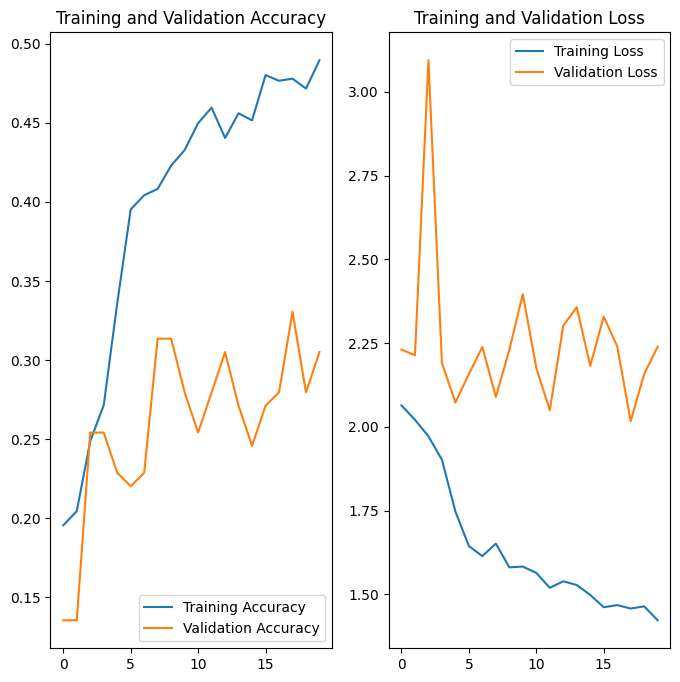

In [22]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()

# **Conculsion**
with DataAugumentation there is slight imporvement in the validation accuracy and but now the model underfitting.

# **Class Imbalance Handling**

Examine the current class distribution in the training dataset

Current Distribution of the Class

In [23]:
def folder_to_dataframe(directory):
    count = []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(
                len(
                    [
                        name
                        for name in os.listdir(path)
                        if os.path.isfile(os.path.join(path, name))
                    ]
                )
            )
    sub_directory = [
        name
        for name in os.listdir(directory)
        if os.path.isdir(os.path.join(directory, name))
    ]

    return pd.DataFrame(
        list(zip(sub_directory, count)), columns=["Class", "No. of Image"]
    )


df_train = folder_to_dataframe(data_dir_train)
df_train

,Class,No. of Image
0,basal cell carcinoma,376
1,squamous cell carcinoma,181
2,vascular lesion,139
3,seborrheic keratosis,77
4,pigmented benign keratosis,462
5,nevus,357
6,dermatofibroma,95
7,melanoma,438
8,actinic keratosis,114


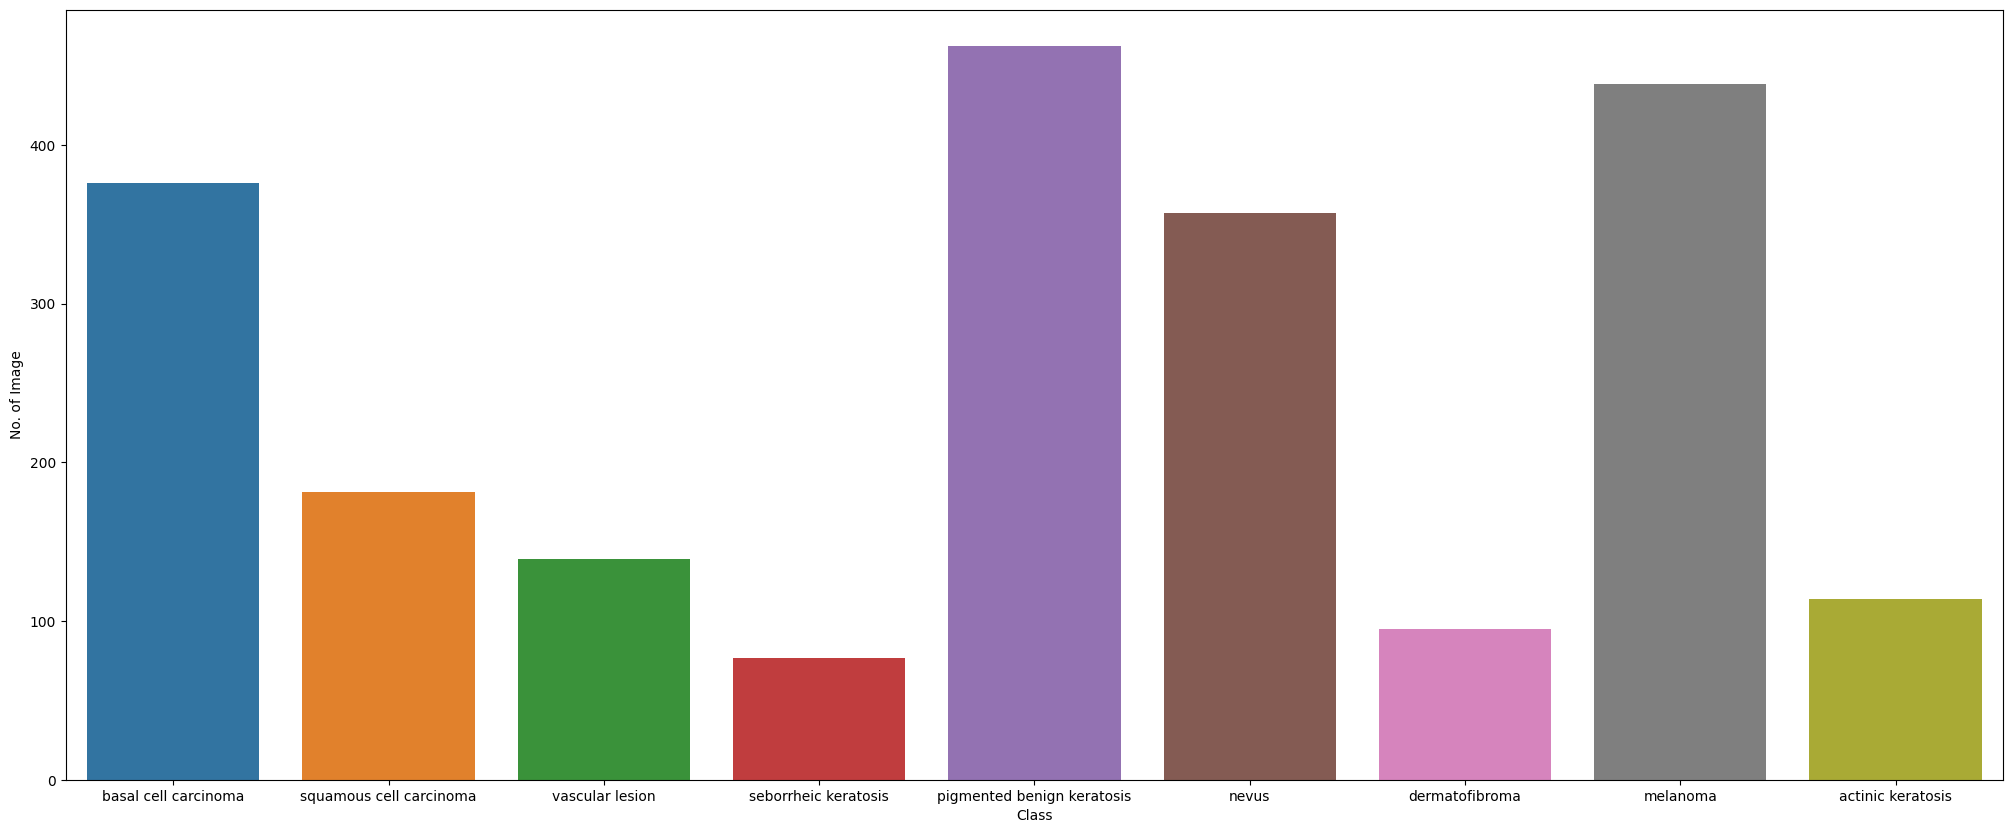

In [24]:
f, ax = plt.subplots(figsize=(25, 10))
sns.barplot(data=df_train, x="Class", y="No. of Image", label="class")
plt.show()

Which class has the least number of samples?
   The least number of samples are present in **seborrheic Keratosis**

Which classes dominate the data in terms of the proportionate number of samples?
    The **pigmented benign keratosis class** is highly dominated data in term of proprtinate number of the class


we use the Augmentor to add more samples across all classes so that none of the classes have very few samples.


In [25]:
!pip install Augmentor

In [26]:
path_to_training_dataset = data_dir_train.absolute().as_posix() + "/"
import Augmentor

for i in class_names:
    print(path_to_training_dataset + i)
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)
    p.skew(magnitude=0.1, probability=0.5)
    p.shear(probability=0.25, max_shear_left=20, max_shear_right=15)
    p.sample(500)

/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis
Initialised with 114 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DEA2133FA00>: 100%|██████████| 500/500 [00:38<00:00, 13.13 Samples/s]


/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma
Initialised with 376 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DEA2137B820>: 100%|██████████| 500/500 [00:40<00:00, 12.27 Samples/s]


/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma
Initialised with 95 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DEA3238EA10>: 100%|██████████| 500/500 [00:30<00:00, 16.40 Samples/s]


/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma
Initialised with 438 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7DEA705777F0>: 100%|██████████| 500/500 [03:15<00:00,  2.56 Samples/s]


/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus
Initialised with 357 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7DEA7054ADD0>: 100%|██████████| 500/500 [02:22<00:00,  3.51 Samples/s]


/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis
Initialised with 462 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DEA2137A6B0>: 100%|██████████| 500/500 [00:29<00:00, 16.68 Samples/s]


/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis
Initialised with 77 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7DEA3238D720>: 100%|██████████| 500/500 [01:21<00:00,  6.13 Samples/s]


/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma
Initialised with 181 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DEA323D92D0>: 100%|██████████| 500/500 [00:31<00:00, 16.03 Samples/s]


/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion
Initialised with 139 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DEA21379630>: 100%|██████████| 500/500 [00:30<00:00, 16.37 Samples/s]


In [27]:
image_count_train = len(list(data_dir_train.glob("*/output/*.jpg")))
print(image_count_train)

4500


In [28]:
def folder_to_dataframe(directory):
    count = []
    for classname in class_names:
        path = directory.absolute().as_posix() + "/" + classname + "/output"
        count.append(
            len(
                [
                    name
                    for name in os.listdir(path)
                    if os.path.isfile(os.path.join(path, name))
                ]
            )
        )

    return pd.DataFrame(
        list(zip(class_names, count)), columns=["Class", "No. of Image"]
    )


df_train = folder_to_dataframe(data_dir_train)
df_train

,Class,No. of Image
0,actinic keratosis,500
1,basal cell carcinoma,500
2,dermatofibroma,500
3,melanoma,500
4,nevus,500
5,pigmented benign keratosis,500
6,seborrheic keratosis,500
7,squamous cell carcinoma,500
8,vascular lesion,500


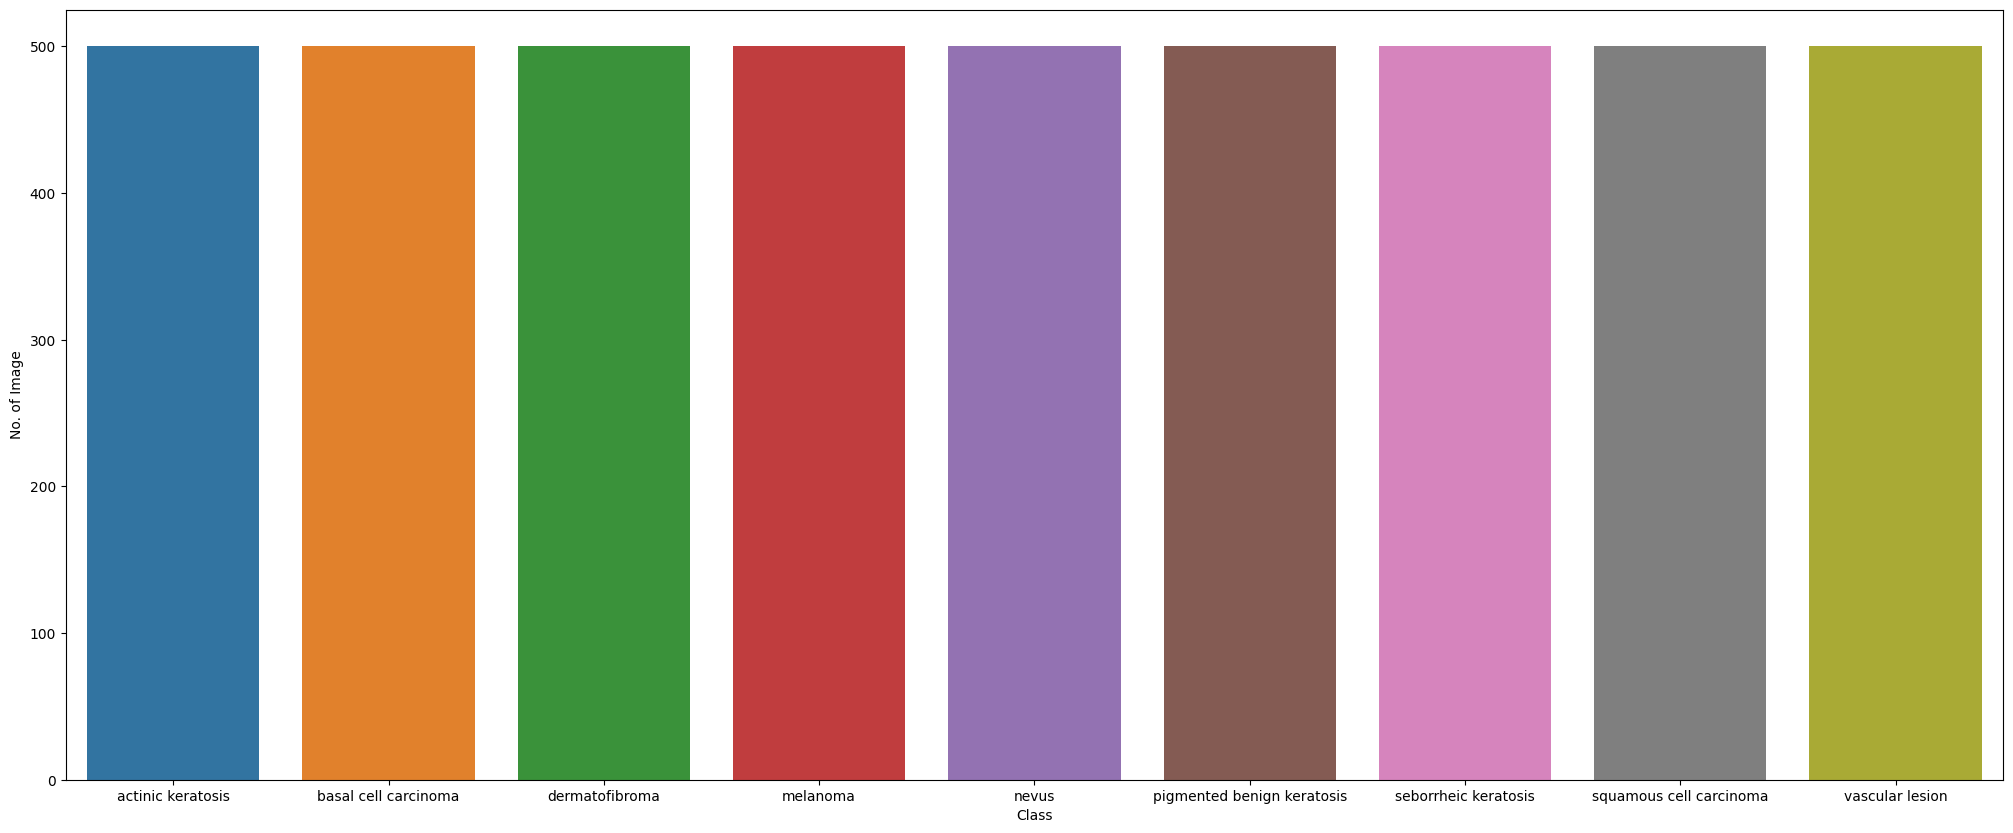

In [29]:
f, ax = plt.subplots(figsize=(25, 10))
sns.barplot(data=df_train, x="Class", y="No. of Image", label="class")
plt.show()

Train the model after class imbalance handling using argumentor

In [30]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset="training",
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [31]:
val_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset="validation",
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


# **Compling and training the model**

We are using the same model architecture and train the model with argumented dataset

In [32]:
model = tf.keras.Sequential(
    [
        data_augmentation,
        tf.keras.layers.Rescaling(1.0 / 255, input_shape=(img_height, img_width, 3)),
        tf.keras.layers.Conv2D(32, 3, padding="same", activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, padding="same", activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(128, 3, padding="same", activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(256, 3, padding="same", activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(512, 3, padding="same", activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation="relu"),
        tf.keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

In [33]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [34]:
epochs = 30
history = model.fit(train_ds, validation_data=val_train_ds, epochs=epochs)

Epoch 1/30
169/169 [==============================] - 51s 263ms/step - loss: 1.9565 - accuracy: 0.2341 - val_loss: 1.6949 - val_accuracy: 0.3645
Epoch 2/30
169/169 [==============================] - 30s 176ms/step - loss: 1.6877 - accuracy: 0.3355 - val_loss: 1.6071 - val_accuracy: 0.3734
Epoch 3/30
169/169 [==============================] - 34s 196ms/step - loss: 1.5602 - accuracy: 0.4013 - val_loss: 1.5291 - val_accuracy: 0.3935
Epoch 4/30
169/169 [==============================] - 32s 183ms/step - loss: 1.5266 - accuracy: 0.3941 - val_loss: 1.4814 - val_accuracy: 0.4388
Epoch 5/30
169/169 [==============================] - 30s 175ms/step - loss: 1.4874 - accuracy: 0.4171 - val_loss: 1.4243 - val_accuracy: 0.4269
Epoch 6/30
169/169 [==============================] - 30s 174ms/step - loss: 1.4525 - accuracy: 0.4303 - val_loss: 1.3637 - val_accuracy: 0.4922
Epoch 7/30
169/169 [==============================] - 31s 179ms/step - loss: 1.4084 - accuracy: 0.4421 - val_loss: 1.4439 - val_ac

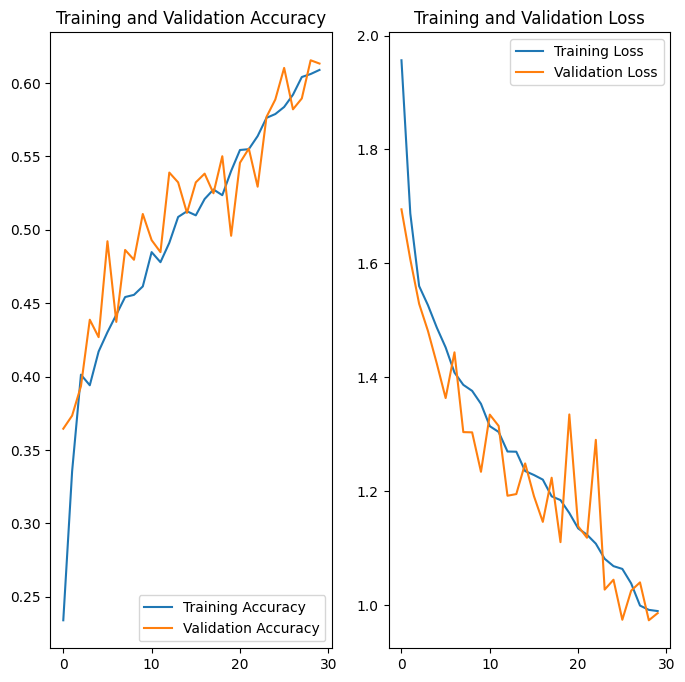

In [35]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()

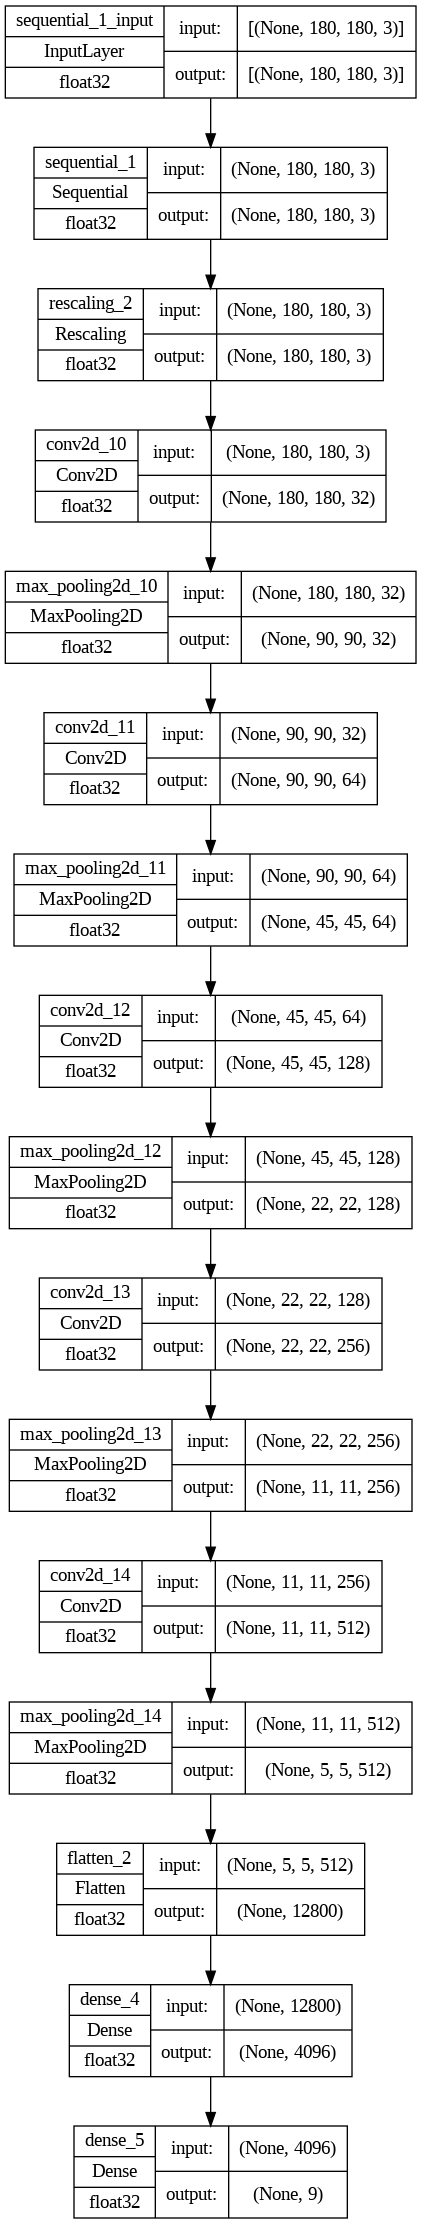

In [36]:
keras.utils.plot_model(
    model, show_dtype=True, show_layer_names=True, show_shapes=True, to_file="model.png"
)

Now the overfitting had been resolved and the accuracy is quite good for training and validation set.

In [37]:
image_batch, labels_batch = next(iter(val_train_ds))

(1, 180, 180, 3) dermatofibroma


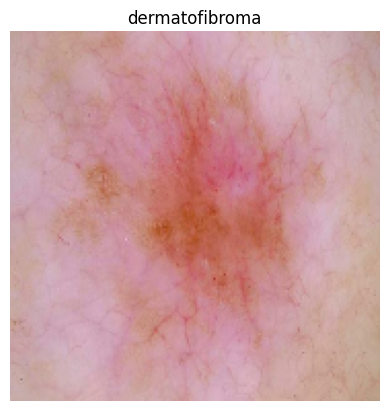

In [38]:
array_size = 12
image_batch, labels_batch = next(iter(val_train_ds))
img = np.expand_dims(image_batch[array_size], 0)
plt.imshow(image_batch[array_size].numpy().astype("uint8"))
plt.title(class_names[labels_batch[array_size]])
plt.axis("off")
print(img.shape, class_names[labels_batch[array_size]])

In [39]:
preds = model.predict(img)
pred = np.argmax(preds, axis=-1)
print(class_names[pred[0]])

1/1 [==============================] - 1s 504ms/step
dermatofibroma
